In [45]:
import pandas as pd
import json
import requests
import numpy as np
from config import weather_api_key
from citipy import citipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# WeatherPy
----

#### Note
* Bringing Data Files

## Generate Cities List

In [2]:
lat_range = (90, -90)
lon_range = (180, -180)

# Blank list to hold latitude and longitude values
lat_lon = []

# Using numpy to generate random latitude and longitude values
lat = np.random.uniform(high=90, low =-90, size= 1200)
lon = np.random.uniform(high=180, low =-180, size= 1200)
lat_lon = list(zip(lat, lon))

# Using "for" loop to generate city list.
city_list = []

for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

# Appending only non-duplicated names to the city list.
    if city not in city_list:
        city_list.append(city)

In [3]:
len(city_list)

522

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"
parameters = {
    "q": city_list,
    "appid": weather_api_key
}

In [4]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city_list[50],
        "appid": weather_api_key})

In [5]:
data = r.json()
data

{'coord': {'lon': -50.01, 'lat': -24.79},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 294.38,
  'feels_like': 292.78,
  'temp_min': 294.38,
  'temp_max': 294.38,
  'pressure': 1018,
  'humidity': 58,
  'sea_level': 1018,
  'grnd_level': 908},
 'visibility': 10000,
 'wind': {'speed': 3.45, 'deg': 79},
 'clouds': {'all': 100},
 'dt': 1600705288,
 'sys': {'country': 'BR', 'sunrise': 1600679412, 'sunset': 1600722946},
 'timezone': -10800,
 'id': 3466704,
 'name': 'Castro',
 'cod': 200}

In [6]:
def extract_data(data):
    return {
        "City": data["name"],
        "Lat": data["coord"]["lat"],
        "Lon": data["coord"]["lon"],
        "Max Temp": data ["main"]["temp_max"],
        "Humidity": data ["main"]["humidity"],
        "Cloudiness": data ["clouds"]["all"],
        "Wind Speed": data ["wind"]["speed"],
        "Country": data["sys"]["country"],
        "Date": data["dt"]
    }
    

In [7]:
city_results = []

In [8]:
# Record counter starts at 1
processing_record = 1

print("Beginning Data Retrieval")
print("----------------------------------------")

for city in city_list:
      
    try:
        data = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city,
        "appid": weather_api_key, 
        "units": "imperial"
        }).json()
        
        city_result = extract_data(data)
        city_results.append(city_result)
        
        processing_record += 1
    
        print("Processing Record {processing_record} | {city}")
                            
    except:
        print("City not found. Skipping...")
    continue
    
print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
    

Beginning Data Retrieval
----------------------------------------
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
City not found. Skipping...
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Re

In [162]:
df = pd.DataFrame(city_results)
df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lander,42.83,-108.73,59.00,43,1,3.36,US,1600705337
1,Ulaangom,49.98,92.07,48.79,60,0,1.95,MN,1600705337


### Creating Scatter Plot to showcase the relation ship between Max Temperature and Latitude

In [10]:
# Converting data in DataFrame so that it can be used to define the X and y value needed for the scatter plot.
X = df["Lat"].values
y = df["Max Temp"].values

<function matplotlib.pyplot.show(close=None, block=None)>

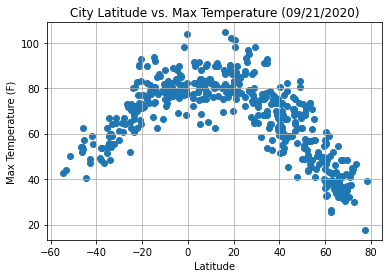

In [11]:
plt.title("City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.show

Here we are examining the relationship between a city's latitude and it's maximum temperature. As you can see, as a city's latitude has a clear relationship to it's max temperature as we would expect. Temperatures appear to be higher the closer they are to the equator, (0) degrees latitude.

### Creating Scatter Plot to showcase the relationship between Humidity and Latitude 

In [12]:
X = df["Lat"].values
y = df["Humidity"].values

<function matplotlib.pyplot.show(close=None, block=None)>

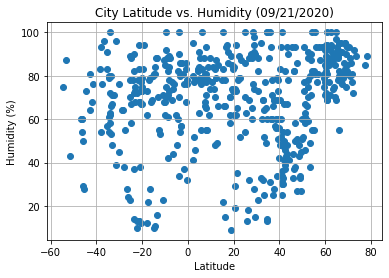

In [13]:
plt.title("City Latitude vs. Humidity (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(X,y)
plt.show

This scatter plot is displaying the relationship between a city's latitude and it's humidity levels. There does not appear to be a clear relationship between cities with higher humidities and their latitude based on the plot. However, there does appear to be an indication that many cities that lie between around -30 degrees and 35 degrees latitude have lower humidity levels. There are basically no cities outside of that range that have humidity levels below 20%.

In [16]:
X = df["Lat"].values
y = df["Cloudiness"].values

<function matplotlib.pyplot.show(close=None, block=None)>

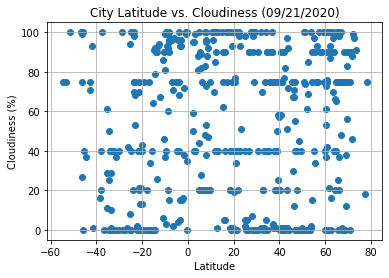

In [17]:
plt.title("City Latitude vs. Cloudiness (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(X,y)
plt.show

This scatter plot showcases the relationship between a cities latitude and its cloud cover. Latitude does not appear to be a major impactor of a city's cloud cover. Cities with high, medium and low cloud cover appear to be evenly distributed across all latitudes.

In [19]:
X = df["Lat"].values
y = df["Wind Speed"].values

<function matplotlib.pyplot.show(close=None, block=None)>

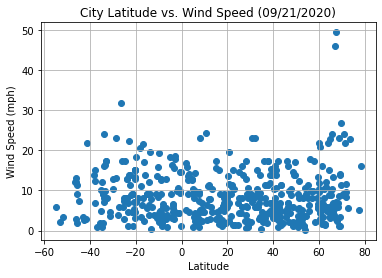

In [20]:
plt.title("City Latitude vs. Wind Speed (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.show

With this plot, we can see that there is perhaps a small relationship between a city's latitude and it wind speed. Although wind speed does appear to be rather equally distibuted, we do see that cities further away from the equator have the potential for higher wind speeds. If you'll notice, there are a slightly higher number of cities with latitudes further away from the equator reporting higher windspeeds.

## Linear Regression

### Temperature (F) vs. Latitude (Northern and Southern Hemisphere)

#### (Northern Hemisphere)

In [61]:
# Created dataframe to display only those cities located in the Northern Hemisphere
NH_df = df[df.Lat > 0]

In [80]:
# Converting the NH_df data so that it can be used to create scatter plots andn perform linear regression.
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Max Temp"].values

In [62]:
#Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [47]:
slope = model.coef_[0]
slope

-0.7517339175126497

In [48]:
intercept = model.intercept_
intercept

93.95103079428735

In [49]:
r_squared = model.score(X_array, y)
r_squared

0.7109812364217741

In [50]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [51]:
max_temp_range = np.arange(min(X), max(X), 0.001)
predict_max_temp = [predict_function(e) for e in max_temp_range]

In [74]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

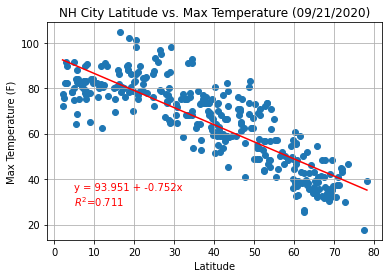

In [63]:
plt.title("NH City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.plot(max_temp_range, predict_max_temp, color="red")
plt.text(5,35, formula, color="red")
plt.text(5,28, r_squared_str, color="red")
plt.show

#### (Southern Hemisphere)

In [81]:
# Created dataframe to display only those cities located in the Northern Hemisphere
SH_df = df[df.Lat < 0]

In [82]:
# Converting the SH_df data so that it can be used to create scatter plots andn perform linear regression.
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Max Temp"].values

In [83]:
#Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [84]:
slope = model.coef_[0]
slope

0.7629750516619533

In [85]:
intercept = model.intercept_
intercept

86.77172718082404

In [87]:
r_squared = model.score(X_array, y)
r_squared

0.679351571085498

In [88]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [89]:
max_temp_range = np.arange(min(X), max(X), 0.001)
predict_max_temp = [predict_function(e) for e in max_temp_range]

In [90]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

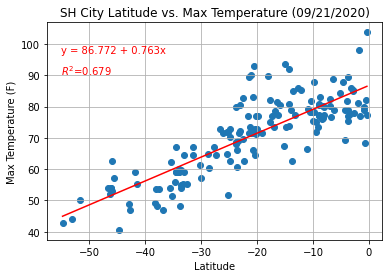

In [93]:
plt.title("SH City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.plot(max_temp_range, predict_max_temp, color="red")
plt.text(-55,97, formula, color="red")
plt.text(-55,90, r_squared_str, color="red")
plt.show

### Humidity (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [119]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Humidity"].values

In [120]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [121]:
slope = model.coef_[0]
slope

0.18062285240807477

In [122]:
intercept = model.intercept_
intercept

63.318197529122685

In [123]:
r_squared = model.score(X_array, y)
r_squared

0.02987737413604008

In [124]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [125]:
humidity_range = np.arange(min(X), max(X), 0.001)
predict_humidity = [predict_function(e) for e in humidity_range]

In [126]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

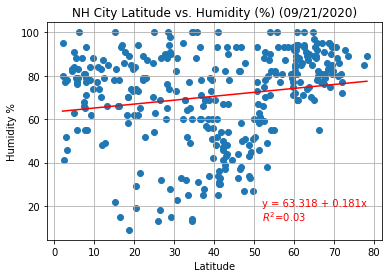

In [127]:
plt.title("NH City Latitude vs. Humidity (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X,y)
plt.plot(humidity_range, predict_humidity, color="red")
plt.text(52,20, formula, color="red")
plt.text(52,13, r_squared_str, color="red")
plt.show

#### (Southern Hemisphere)

In [128]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Humidity"].values

In [129]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [130]:
slope = model.coef_[0]
slope

0.13857354975544192

In [131]:
intercept = model.intercept_
intercept

68.2201745516333

In [132]:
r_squared = model.score(X_array, y)
r_squared

0.006972196411703879

In [133]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [134]:
humidity_range = np.arange(min(X), max(X), 0.001)
predict_humidity = [predict_function(e) for e in humidity_range]

In [135]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

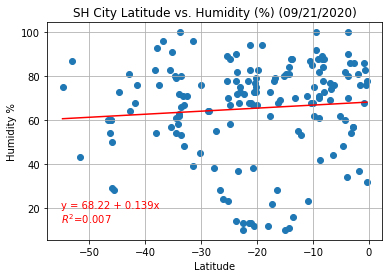

In [136]:
plt.title("SH City Latitude vs. Humidity (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X,y)
plt.plot(humidity_range, predict_humidity, color="red")
plt.text(-55,20, formula, color="red")
plt.text(-55,13, r_squared_str, color="red")
plt.show

### Cloudiness (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [138]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Cloudiness"].values

In [139]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [140]:
slope = model.coef_[0]
slope

-0.05631315385596905

In [141]:
intercept = model.intercept_
intercept

53.98110793294168

In [142]:
r_squared = model.score(X_array, y)
r_squared

0.0009113504507054504

In [143]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [144]:
cloudiness_range = np.arange(min(X), max(X), 0.001)
predict_cloudiness = [predict_function(e) for e in cloudiness_range]

In [145]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

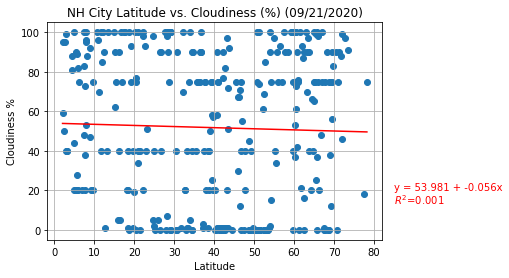

In [150]:
plt.title("NH City Latitude vs. Cloudiness (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X,y)
plt.plot(cloudiness_range, predict_cloudiness, color="red")
plt.text(85,20, formula, color="red")
plt.text(85,13, r_squared_str, color="red")
plt.show

#### (Southern Hemisphere)

In [151]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Cloudiness"].values

In [152]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [153]:
slope = model.coef_[0]
slope

0.5790571947105981

In [154]:
intercept = model.intercept_
intercept

58.49607973377157

In [155]:
r_squared = model.score(X_array, y)
r_squared

0.041236275962268976

In [156]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [157]:
cloudiness_range = np.arange(min(X), max(X), 0.001)
predict_cloudiness = [predict_function(e) for e in cloudiness_range]

In [158]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

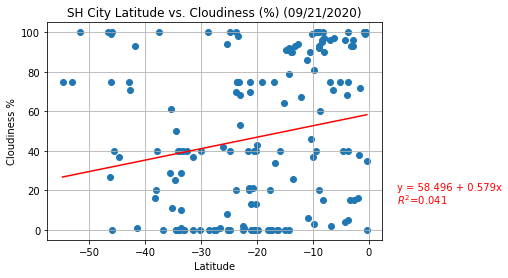

In [161]:
plt.title("SH City Latitude vs. Cloudiness (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X,y)
plt.plot(cloudiness_range, predict_cloudiness, color="red")
plt.text(5,20, formula, color="red")
plt.text(5,13, r_squared_str, color="red")
plt.show

### Wind Speed (mph) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [163]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Wind Speed"].values

In [164]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [165]:
slope = model.coef_[0]
slope

0.0372160303422728

In [166]:
intercept = model.intercept_
intercept

6.669690555618436

In [167]:
r_squared = model.score(X_array, y)
r_squared

0.01468027427126739

In [168]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [169]:
wind_speed_range = np.arange(min(X), max(X), 0.001)
predict_wind_speed_range = [predict_function(e) for e in wind_speed_range]

In [145]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

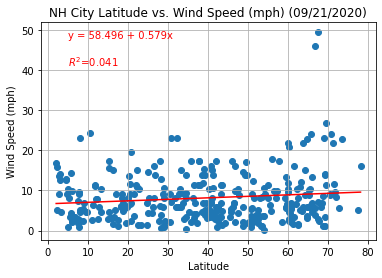

In [173]:
plt.title("NH City Latitude vs. Wind Speed (mph) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.plot(wind_speed_range, predict_wind_speed_range, color="red")
plt.text(5,48, formula, color="red")
plt.text(5,41, r_squared_str, color="red")
plt.show

#### (Southern Hemisphere)

In [174]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Wind Speed"].values

In [175]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [176]:
slope = model.coef_[0]
slope

-0.021646196903929844

In [177]:
intercept = model.intercept_
intercept

8.52469091723904

In [178]:
r_squared = model.score(X_array, y)
r_squared

0.0024469381701857085

In [179]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [180]:
wind_speed_range = np.arange(min(X), max(X), 0.001)
predict_wind_speed_range = [predict_function(e) for e in wind_speed_range]

In [181]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

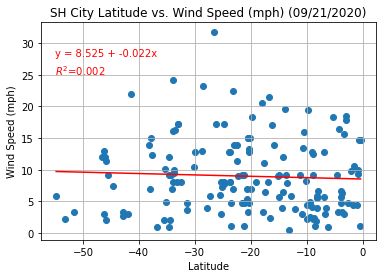

In [187]:
plt.title("SH City Latitude vs. Wind Speed (mph) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.plot(wind_speed_range, predict_wind_speed_range, color="red")
plt.text(-55,28, formula, color="red")
plt.text(-55,25, r_squared_str, color="red")
plt.show